In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
result = pd.read_csv('../flood_test_grid.csv')
result = result[result['unreliable'] == True]

result

,nclerk,nservers,unreliable,total_packets,total_put,total_query,duration,servers,rpcs
0,3,3,True,274,144,130,10.1,3,765
2,3,5,True,229,113,116,10.1,5,1138
4,3,7,True,237,116,121,10.1,7,1766
6,3,9,True,224,105,119,10.1,9,1585
8,3,11,True,221,109,112,10.2,11,2715
...,...,...,...,...,...,...,...,...,...
328,51,19,True,2142,1078,1064,10.6,19,20069
330,51,21,True,2079,1040,1039,11.0,21,21374
332,51,31,True,1409,720,689,11.3,31,31870
334,51,41,True,1353,679,674,11.2,41,28592


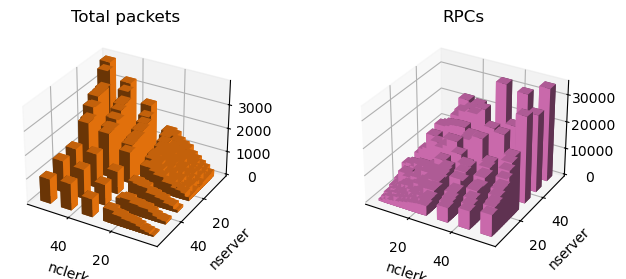

In [7]:
# plot the 3D plot: x is nclerk, y is nservers, and z is total_packets

# set up the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

x = result['nclerk']
y = result['nservers']

top1 = result['total_packets']
top2 = result['rpcs']
bottom = np.zeros_like(top1)
width = depth = 5

ax1.bar3d(x, y, bottom, width, depth, top1, shade=True, color='C1')
ax1.view_init(30, 120)
ax1.set_title('Total packets')
ax1.set_xlabel('nclerk')
ax1.set_ylabel('nserver')

ax2.bar3d(x, y, bottom, width, depth, top2, shade=True, color='C6')
ax2.set_title('RPCs')
ax2.set_xlabel('nclerk')
ax2.set_ylabel('nserver')

plt.show()

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3] [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]
[0 1 2 3 1 2 3 4 2 3 4 5 3 4 5 6 4 5 6 7]


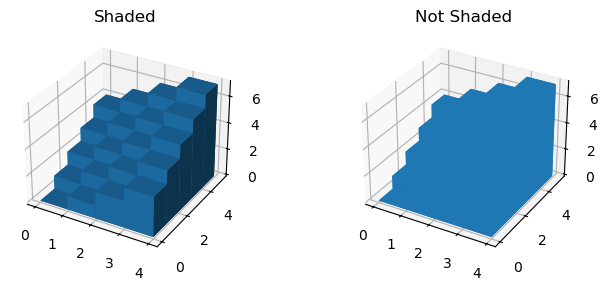

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# set up the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
print(_xx)
x, y = _xx.ravel(), _yy.ravel()
print(x, y)

top = x + y
print(top)
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()

In [5]:
with open('../crash_test_log.txt', 'r') as f:
    log = f.read()

log

'[INFO] : nclerks: 5, nservers: 5, unreliable: false, dnsDuration: 20, crash: true\nStart ...\nStart ...\nUDP server (clerk 0) listening on :9876...\nUDP server (clerk 3) listening on :9879...\nUDP server (clerk 4) listening on :9880...\nUDP server (clerk 1) listening on :9877...\nUDP server (clerk 2) listening on :9878...\nshutdown server 4, time: 2024-05-04 18:36:55.315590233 +0800 CST m=+1.023977007\nshutdown server 3, time: 2024-05-04 18:36:55.384858632 +0800 CST m=+1.093245402\nstart server 4, time: 2024-05-04 18:36:56.425673702 +0800 CST m=+2.134060474\nstart server 3, time: 2024-05-04 18:36:56.658181255 +0800 CST m=+2.366568037\nshutdown server 0, time: 2024-05-04 18:36:57.565936237 +0800 CST m=+3.274323011\nshutdown server 2, time: 2024-05-04 18:36:57.59742633 +0800 CST m=+3.305813104\nstart server 0, time: 2024-05-04 18:36:58.728225369 +0800 CST m=+4.436612141\nshutdown server 4, time: 2024-05-04 18:36:58.760183221 +0800 CST m=+4.468569993\nstart server 2, time: 2024-05-04 18:

In [30]:
pattern = r'server (\d+).*?m\=\+(\d+\.\d+)'

import re, itertools

OFFSET = 0.

data = re.findall(pattern, log, re.DOTALL)

# Sort the data by the server id
sorted_data = sorted(data, key=lambda x: x[0])

# Group the sorted data by the server id
grouped_data = itertools.groupby(sorted_data, key=lambda x: x[0])

# Save the grouped data to a dictionary (server_id: [list of values])
server_data = {k: [float(v)-OFFSET for _, v in g] for k, g in grouped_data}

# server_data

Text(0.5, 1.0, 'Failure periods of each server')

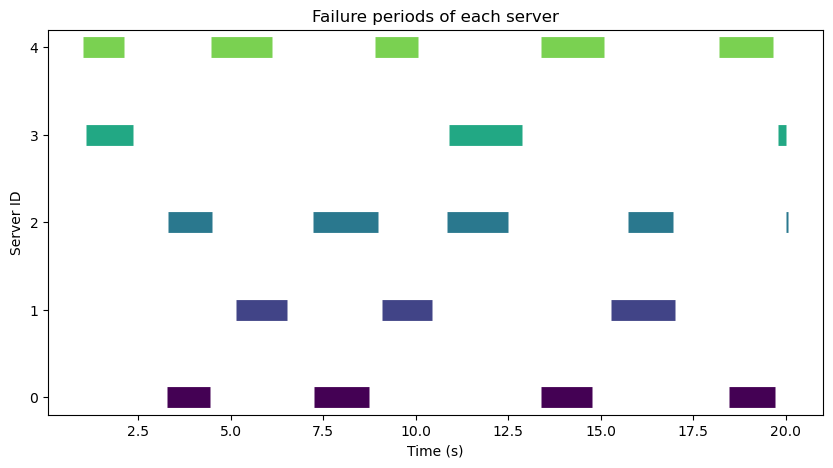

In [44]:
# Plot the operation periods of each server

fig, ax = plt.subplots(figsize=(10, 5))

for server_id, data in server_data.items():
    data = data + [20] if len(data) % 2 == 1 else data
    server_id = int(server_id)

    cmap = plt.get_cmap('viridis')

    for i in range(0, len(data), 2):
        ax.plot([data[i], data[i+1]], [server_id, server_id], c=cmap(0.2 * server_id), linewidth=15, solid_capstyle='butt')

ax.set_yticks([float(x) for x in server_data.keys()])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Server ID')
ax.set_title('Failure periods of each server')